In [1]:
import pandas as pd

In [2]:
def linear(mas, st):
    """ линейный поиск:
    Выводит найденные элементы, равные образцу. Если не удалось найти - сообщение об этом.
    mas -- последовательность объектов, среди которых необходимо произвести поиск
    st -- объект, который необходимо найти """
    
    """ Пробегается по всем элементам последовательности и сравнивает каждый с образцом """
    flag = 0
    for i in mas:
        if i == st:
            print(i) 
            flag += 1
    if flag == 0:
        print("There's no object that equals", st)

In [3]:
def binary(mas, st):
    """ бинарный поиск:
    Выводит найденные элементы, равные образцу.
    mas -- последовательность отсортированных по неубыванию объектов, среди которых необходимо произвести поиск
    st -- объект, который необходимо найти """
    
    """ Образец сравнивается с выбираемым средним объектом:
    Если они равны, то объект выводится.
    Если образец <=, чем средний объект, то происходит поиск в левой относительно среднего части mas (не включая средний)
    Если образец >=, чем средний объект, то происходит поиск в правой относительно среднего части mas (не включая средний) """
    if len(mas) == 0:
        return 0
    else:
        mid = len(mas) // 2
        if st == mas[mid]:
            print(mas[mid])
        if mas[mid] >= st:
            binary(mas[:mid], st)
        if mas[mid] <= st:
            binary(mas[mid+1:], st)

In [4]:
def sortmerge(m1, m2):
    """ возвращает список элементов последовательностей m1 и m2, отсортированных по неубыванию
    m1 -- последовательность объектов, отсортированных по неубыванию
    m2 -- последовательность объектов, отсортированных по неубыванию """
    result = [] # возвращаемая итоговая отсортированная последовательность
    while len(m1) > 0 and len(m2) > 0:
        """ выполняем, пока одна из последовательностей m1 или m2 не опустеет:
        в result поочередно записываем наименьший из минимальных элементов m1 и m2
        и удаляем его из соответствующей последовательности """
        if m1[0] < m2[0]:
            result.append(m1[0])
            m1.pop(0)
        else:
            result.append(m2[0])
            m2.pop(0)
    """ из предыдущего цикла вышли, потому что одна из последовательностей m1 или m2 опустела:
    находим ту, в которой еще есть отсортированные элементы, не записанные в result,
    и конкатенируем эти последовательности """
    if len(m1) > 0:
        result = result + m1
    elif len(m2) > 0:
        result = result + m2
    return result
            
def merge(mas):
    """ алгоритм сортировки слиянием (рекурсивный):
    возвращает список отсортированных по неубыванию объектов
    mas -- последовательность объектов, которую необходимо отсортировать """
    
    """ делим исходную последовательность на элементы по одному объекту,
    далее соседние между собой по-особенному(функцией sortmerge) конкатенируем.
    Полученные соседние группы так же между собой этой функцией конкатенируются.
    И т.д., пока не получится одна группа, которая и будет отсортированной последовательностью """
    if len(mas) < 2:
        return mas
    else:
        mid = len(mas) // 2
        left = merge(mas[:mid])
        right = merge(mas[mid:])
        return sortmerge(left, right)

In [5]:
#from dataclasses import dataclass
#@dataclass
class Cars:
    """ инициализация экземпляра класса Cars:
    name -- ФИО владельца(default пустая строка)
    тип name -- string
    brand -- марка автомобиля(default пустая строка)
    тип brand -- string
    year -- год выпуска(default 0)
    тип year -- int
    number -- государственный номер(default пустая строка)
    тип number -- string
    color -- цвет(default пустая строка)
    тип color -- string """
    def __init__(self, name = '', brand = '', year = 0, number = '', color = ''):
        self.name = name
        self.brand = brand
        self.year = year
        self.number = number
        self.color = color
        
    def __eq__(self, other):
        """ переопределение оператора ==.
        Сравнение ведется по ФИО.
        other -- объект справа от оператора 
        возвращает: True, если объект слева = объекту справа, иначе False """
        if self.name == other:
            return True
        else:
            return False
        
    def __lt__(self, other):
        """ переопределение оператора <.
        Сравнение ведется по ФИО.
        other -- объект справа от оператора 
        возвращает: True, если объект слева < объектa справа, иначе False """
        if self.name < other:
            return True
        else:
            return False
        
    def __gt__(self, other):
        """ переопределение оператора >.
        Сравнение ведется по ФИО.
        other -- объект справа от оператора 
        возвращает: True, если объект слева > объектa справа, иначе False """
        if self.name > other:
            return True
        else:
            return False
        
    def __le__(self, other):
        """ переопределение оператора <=.
        Сравнение ведется по ФИО.
        other -- объект справа от оператора 
        возвращает: True, если объект слева <= объектa справа, иначе False """
        if self.name <= other:
            return True
        else:
            return False
        
    def __ge__(self, other):
        """ переопределение оператора >=.
        Сравнение ведется по ФИО.
        other -- объект справа от оператора 
        возвращает: True, если объект слева >= объектa справа, иначе False """
        if self.name >= other:
            return True
        else:
            return False
        
    def __repr__(self):
        """ Вывод экземпляра класса """
        return '%r' % self.__dict__

In [6]:
""" Инициализация списков значений времени поиска 
тип -- list """
linear_time, binarysort_time, binary_time = [], [], []

## n=100 

In [7]:
from time import time
import random

""" В таблицу df записываются данные из df100.xlsx.
Создается список cars экземпляров класса Cars, данные для которых берутся из таблицы df. 
Берем рандомное ФИО из тех, что есть в данном массиве данных - это наш образец"""
df = pd.DataFrame()
df = pd.read_excel('df100.xlsx')
cars = []
for i in range(100):
    cars.append(Cars(name = df.iloc[i]['name'], brand = df.iloc[i]['car'], year = df.iloc[i]['year'], number = df.iloc[i]['number'], color = df.iloc[i]['color']))
finds = random.choice(df['name'])
print('Ищем данные о владельцах по имени',finds)

""" Происходит линейный поиск ФИО finds в списке cars и засечение времени поиска """
print('Линейный поиск:')
tic = time()
linear(cars, finds)
toc = time()
linear_time.append(toc-tic)

""" Происходит сортировка списка cars, бинарный поиск ФИО finds в этом списке и засечение времени поиска """
print('Бинарный поиск + сортировка:')
tic = time()
sortcars = merge(cars)
binary(sortcars, finds)
toc = time()
binarysort_time.append(toc-tic)

""" Происходит бинарный поиск ФИО finds в списке cars и засечение времени поиска """
print('Бинарный поиск в отсортированном:')
tic = time()
binary(sortcars, finds)
toc = time()
binary_time.append(toc-tic)

Ищем данные о владельцах по имени Станимир Жоресович Пономарев
Линейный поиск:
{'name': 'Станимир Жоресович Пономарев', 'brand': 'KIA', 'year': 1930, 'number': 'р799ех 51', 'color': 'Темно-оранжевый'}
Бинарный поиск + сортировка:
{'name': 'Станимир Жоресович Пономарев', 'brand': 'KIA', 'year': 1930, 'number': 'р799ех 51', 'color': 'Темно-оранжевый'}
Бинарный поиск в отсортированном:
{'name': 'Станимир Жоресович Пономарев', 'brand': 'KIA', 'year': 1930, 'number': 'р799ех 51', 'color': 'Темно-оранжевый'}


## n=500 

In [8]:
""" В таблицу df записываются данные из df500.xlsx.
Создается список cars экземпляров класса Cars, данные для которых берутся из таблицы df. 
Берем рандомное ФИО из тех, что есть в данном массиве данных - это наш образец"""
df = pd.DataFrame()
df = pd.read_excel('df500.xlsx')
cars = []
for i in range(500):
    cars.append(Cars(name = df.iloc[i]['name'], brand = df.iloc[i]['car'], year = df.iloc[i]['year'], number = df.iloc[i]['number'], color = df.iloc[i]['color']))
finds = random.choice(df['name'])
print('Ищем данные о владельцах по имени',finds)

""" Происходит линейный поиск ФИО finds в списке cars и засечение времени поиска """
print('Линейный поиск:')
tic = time()
linear(cars, finds)
toc = time()
linear_time.append(toc-tic)

""" Происходит сортировка списка cars, бинарный поиск ФИО finds в этом списке и засечение времени поиска """
print('Бинарный поиск + сортировка:')
tic = time()
sortcars = merge(cars)
binary(sortcars, finds)
toc = time()
binarysort_time.append(toc-tic)

""" Происходит бинарный поиск ФИО finds в списке cars и засечение времени поиска """
print('Бинарный поиск в отсортированном:')
tic = time()
binary(sortcars, finds)
toc = time()
binary_time.append(toc-tic)

Ищем данные о владельцах по имени Ситникова Лора Наумовна
Линейный поиск:
{'name': 'Ситникова Лора Наумовна', 'brand': 'Hyundai', 'year': 2015, 'number': 'м548пк 67', 'color': 'Фиолетовый'}
Бинарный поиск + сортировка:
{'name': 'Ситникова Лора Наумовна', 'brand': 'Hyundai', 'year': 2015, 'number': 'м548пк 67', 'color': 'Фиолетовый'}
Бинарный поиск в отсортированном:
{'name': 'Ситникова Лора Наумовна', 'brand': 'Hyundai', 'year': 2015, 'number': 'м548пк 67', 'color': 'Фиолетовый'}


## n=1000 

In [9]:
""" В таблицу df записываются данные из df1000.xlsx.
Создается список cars экземпляров класса Cars, данные для которых берутся из таблицы df. 
Берем рандомное ФИО из тех, что есть в данном массиве данных - это наш образец"""
df = pd.DataFrame()
df = pd.read_excel('df1000.xlsx')
cars = []
for i in range(1000):
    cars.append(Cars(name = df.iloc[i]['name'], brand = df.iloc[i]['car'], year = df.iloc[i]['year'], number = df.iloc[i]['number'], color = df.iloc[i]['color']))
finds = random.choice(df['name'])
print('Ищем данные о владельцах по имени',finds)

""" Происходит линейный поиск ФИО finds в списке cars и засечение времени поиска """
print('Линейный поиск:')
tic = time()
linear(cars, finds)
toc = time()
linear_time.append(toc-tic)

""" Происходит сортировка списка cars, бинарный поиск ФИО finds в этом списке и засечение времени поиска """
print('Бинарный поиск + сортировка:')
tic = time()
sortcars = merge(cars)
binary(sortcars, finds)
toc = time()
binarysort_time.append(toc-tic)

""" Происходит бинарный поиск ФИО finds в списке cars и засечение времени поиска """
print('Бинарный поиск в отсортированном:')
tic = time()
binary(sortcars, finds)
toc = time()
binary_time.append(toc-tic)

Ищем данные о владельцах по имени Макаров Мефодий Анисимович
Линейный поиск:
{'name': 'Макаров Мефодий Анисимович', 'brand': 'Mitsubishi', 'year': 1937, 'number': 'ы252ат 3', 'color': 'Слоновая кость'}
Бинарный поиск + сортировка:
{'name': 'Макаров Мефодий Анисимович', 'brand': 'Mitsubishi', 'year': 1937, 'number': 'ы252ат 3', 'color': 'Слоновая кость'}
Бинарный поиск в отсортированном:
{'name': 'Макаров Мефодий Анисимович', 'brand': 'Mitsubishi', 'year': 1937, 'number': 'ы252ат 3', 'color': 'Слоновая кость'}


## n=5000 

In [10]:
""" В таблицу df записываются данные из df5000.xlsx.
Создается список cars экземпляров класса Cars, данные для которых берутся из таблицы df. 
Берем рандомное ФИО из тех, что есть в данном массиве данных - это наш образец"""
df = pd.DataFrame()
df = pd.read_excel('df5000.xlsx')
cars = []
for i in range(5000):
    cars.append(Cars(name = df.iloc[i]['name'], brand = df.iloc[i]['car'], year = df.iloc[i]['year'], number = df.iloc[i]['number'], color = df.iloc[i]['color']))
finds = random.choice(df['name'])
print('Ищем данные о владельцах по имени',finds)

""" Происходит линейный поиск ФИО finds в списке cars и засечение времени поиска """
print('Линейный поиск:')
tic = time()
linear(cars, finds)
toc = time()
linear_time.append(toc-tic)

""" Происходит сортировка списка cars, бинарный поиск ФИО finds в этом списке и засечение времени поиска """
print('Бинарный поиск + сортировка:')
tic = time()
sortcars = merge(cars)
binary(sortcars, finds)
toc = time()
binarysort_time.append(toc-tic)

""" Происходит бинарный поиск ФИО finds в списке cars и засечение времени поиска """
print('Бинарный поиск в отсортированном:')
tic = time()
binary(sortcars, finds)
toc = time()
binary_time.append(toc-tic)

Ищем данные о владельцах по имени Пахомова Екатерина Болеславовна
Линейный поиск:
{'name': 'Пахомова Екатерина Болеславовна', 'brand': 'Tesla', 'year': 1950, 'number': 'ч149мл 96', 'color': 'Бежевый'}
Бинарный поиск + сортировка:
{'name': 'Пахомова Екатерина Болеславовна', 'brand': 'Tesla', 'year': 1950, 'number': 'ч149мл 96', 'color': 'Бежевый'}
Бинарный поиск в отсортированном:
{'name': 'Пахомова Екатерина Болеславовна', 'brand': 'Tesla', 'year': 1950, 'number': 'ч149мл 96', 'color': 'Бежевый'}


## n=10.000 

In [11]:
""" В таблицу df записываются данные из df10000.xlsx.
Создается список cars экземпляров класса Cars, данные для которых берутся из таблицы df. 
Берем рандомное ФИО из тех, что есть в данном массиве данных - это наш образец"""
df = pd.DataFrame()
df = pd.read_excel('df10000.xlsx')
cars = []
for i in range(10000):
    cars.append(Cars(name = df.iloc[i]['name'], brand = df.iloc[i]['car'], year = df.iloc[i]['year'], number = df.iloc[i]['number'], color = df.iloc[i]['color']))
finds = random.choice(df['name'])
print('Ищем данные о владельцах по имени',finds)

""" Происходит линейный поиск ФИО finds в списке cars и засечение времени поиска """
print('Линейный поиск:')
tic = time()
linear(cars, finds)
toc = time()
linear_time.append(toc-tic)

""" Происходит сортировка списка cars, бинарный поиск ФИО finds в этом списке и засечение времени поиска """
print('Бинарный поиск + сортировка:')
tic = time()
sortcars = merge(cars)
binary(sortcars, finds)
toc = time()
binarysort_time.append(toc-tic)

""" Происходит бинарный поиск ФИО finds в списке cars и засечение времени поиска """
print('Бинарный поиск в отсортированном:')
tic = time()
binary(sortcars, finds)
toc = time()
binary_time.append(toc-tic)

Ищем данные о владельцах по имени Логинов Гурий Георгиевич
Линейный поиск:
{'name': 'Логинов Гурий Георгиевич', 'brand': 'Chevrolet', 'year': 1928, 'number': 'т736нч 94', 'color': 'Белый'}
Бинарный поиск + сортировка:
{'name': 'Логинов Гурий Георгиевич', 'brand': 'Chevrolet', 'year': 1928, 'number': 'т736нч 94', 'color': 'Белый'}
Бинарный поиск в отсортированном:
{'name': 'Логинов Гурий Георгиевич', 'brand': 'Chevrolet', 'year': 1928, 'number': 'т736нч 94', 'color': 'Белый'}


## n=50.000 

In [12]:
""" В таблицу df записываются данные из df50000.xlsx.
Создается список cars экземпляров класса Cars, данные для которых берутся из таблицы df. 
Берем рандомное ФИО из тех, что есть в данном массиве данных - это наш образец"""
df = pd.DataFrame()
df = pd.read_excel('df50000.xlsx')
cars = []
for i in range(50000):
    cars.append(Cars(name = df.iloc[i]['name'], brand = df.iloc[i]['car'], year = df.iloc[i]['year'], number = df.iloc[i]['number'], color = df.iloc[i]['color']))
finds = random.choice(df['name'])
print('Ищем данные о владельцах по имени',finds)

""" Происходит линейный поиск ФИО finds в списке cars и засечение времени поиска """
print('Линейный поиск:')
tic = time()
linear(cars, finds)
toc = time()
linear_time.append(toc-tic)

""" Происходит сортировка списка cars, бинарный поиск ФИО finds в этом списке и засечение времени поиска """
print('Бинарный поиск + сортировка:')
tic = time()
sortcars = merge(cars)
binary(sortcars, finds)
toc = time()
binarysort_time.append(toc-tic)

""" Происходит бинарный поиск ФИО finds в списке cars и засечение времени поиска """
print('Бинарный поиск в отсортированном:')
tic = time()
binary(sortcars, finds)
toc = time()
binary_time.append(toc-tic)

Ищем данные о владельцах по имени Евгения Кузьминична Беспалова
Линейный поиск:
{'name': 'Евгения Кузьминична Беспалова', 'brand': 'Mitsubishi', 'year': 1929, 'number': 'т499кц 18', 'color': 'Темно-розовый'}
Бинарный поиск + сортировка:
{'name': 'Евгения Кузьминична Беспалова', 'brand': 'Mitsubishi', 'year': 1929, 'number': 'т499кц 18', 'color': 'Темно-розовый'}
Бинарный поиск в отсортированном:
{'name': 'Евгения Кузьминична Беспалова', 'brand': 'Mitsubishi', 'year': 1929, 'number': 'т499кц 18', 'color': 'Темно-розовый'}


## n=100.000 

In [13]:
""" В таблицу df записываются данные из df100000.xlsx.
Создается список cars экземпляров класса Cars, данные для которых берутся из таблицы df. 
Берем рандомное ФИО из тех, что есть в данном массиве данных - это наш образец"""
df = pd.DataFrame()
df = pd.read_excel('df100000.xlsx')
cars = []
for i in range(100000):
    cars.append(Cars(name = df.iloc[i]['name'], brand = df.iloc[i]['car'], year = df.iloc[i]['year'], number = df.iloc[i]['number'], color = df.iloc[i]['color']))
finds = random.choice(df['name'])
print('Ищем данные о владельцах по имени',finds)

""" Происходит линейный поиск ФИО finds в списке cars и засечение времени поиска """
print('Линейный поиск:')
tic = time()
linear(cars, finds)
toc = time()
linear_time.append(toc-tic)

""" Происходит сортировка списка cars, бинарный поиск ФИО finds в этом списке и засечение времени поиска """
print('Бинарный поиск + сортировка:')
tic = time()
sortcars = merge(cars)
binary(sortcars, finds)
toc = time()
binarysort_time.append(toc-tic)

""" Происходит бинарный поиск ФИО finds в списке cars и засечение времени поиска """
print('Бинарный поиск в отсортированном:')
tic = time()
binary(sortcars, finds)
toc = time()
binary_time.append(toc-tic)

Ищем данные о владельцах по имени Кузьмина Юлия Руслановна
Линейный поиск:
{'name': 'Кузьмина Юлия Руслановна', 'brand': 'Honda', 'year': 1913, 'number': 'ц983ыц 96', 'color': 'Хаки'}
Бинарный поиск + сортировка:
{'name': 'Кузьмина Юлия Руслановна', 'brand': 'Honda', 'year': 1913, 'number': 'ц983ыц 96', 'color': 'Хаки'}
Бинарный поиск в отсортированном:
{'name': 'Кузьмина Юлия Руслановна', 'brand': 'Honda', 'year': 1913, 'number': 'ц983ыц 96', 'color': 'Хаки'}


[]

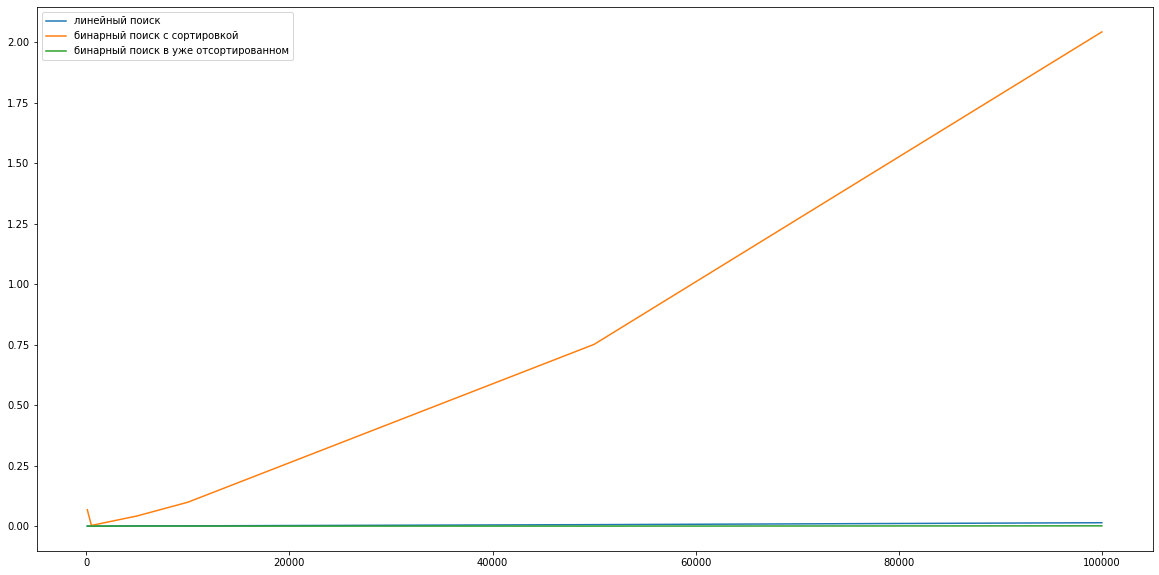

In [23]:
import matplotlib.pyplot as plt

""" Построение графика зависимости времени поиска от величины выборки """
sizes = [100, 500, 1000, 5000, 10000, 50000, 100000]
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(sizes, linear_time, label = 'линейный поиск')
ax.plot(sizes, binarysort_time, label = 'бинарный поиск с сортировкой')
ax.plot(sizes, binary_time, label = 'бинарный поиск в уже отсортированном')
ax.legend()
ax.plot()

[]

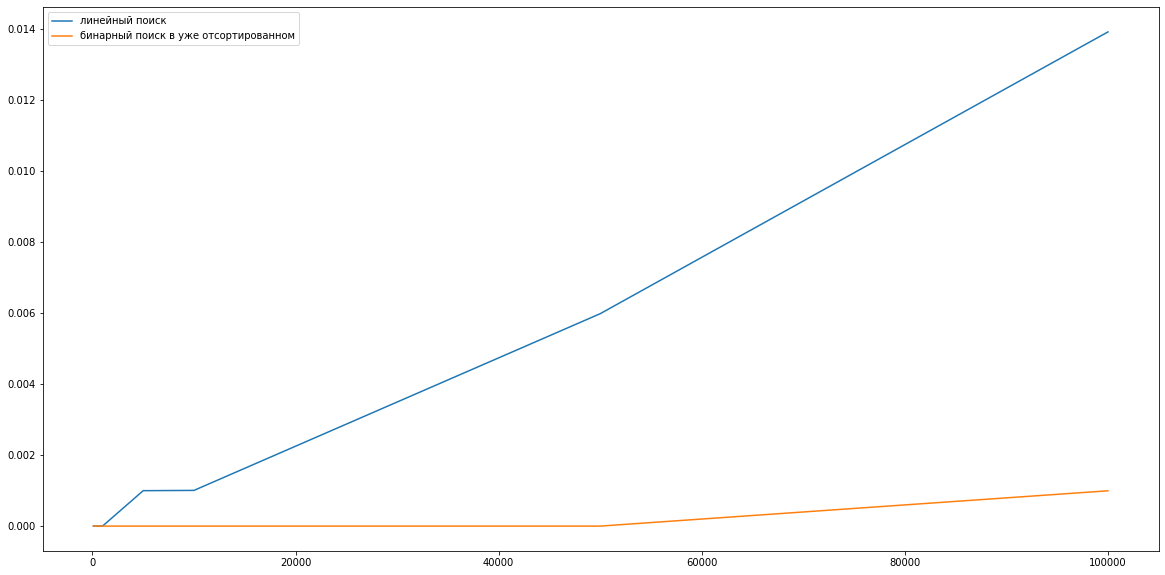

In [24]:
""" Построение графика зависимости времени поиска от величины выборки """
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(sizes, linear_time, label = 'линейный поиск')
ax.plot(sizes, binary_time, label = 'бинарный поиск в уже отсортированном')
ax.legend()
ax.plot()

In [16]:
""" Инициализация списка значений времени поиска в ассоциативном массиве """
multimap_time = []
for j in sizes:
    """ В таблицу df записываются данные из файла с массивом данных объема j (те же, что использовались ранее) """
    df = pd.read_excel(f'df{j}.xlsx')
    """ Инициализация ассоциативного массива """
    dic = {}
    for i in range(len(df)):
        """ Просматриваем каждую строку таблицы df:
        если в ассоциативном массиве dic нет записи с ФИО из текущей строки, то создаем
        в противном случае добавляем к существуюшему значению текущую строку """
        if dic.get(df['name'][i]) == None:
            dic[df['name'][i]] = [df['car'][i], df['year'][i], df['number'][i], df['color'][i]]
        else:
            dic[df['name'][i]].append([df['car'][i], df['year'][i], df['number'][i], df['color'][i]])
    """ Образец, который ищем, - рандомное ФИО из существующих в таблице df 
    Засекаем время поиска образца в ассоциативном массиве dic """
    find = random.choice(df['name'])
    tic = time()
    p = dic.get(find)
    toc = time()
    multimap_time.append(toc - tic)

[]

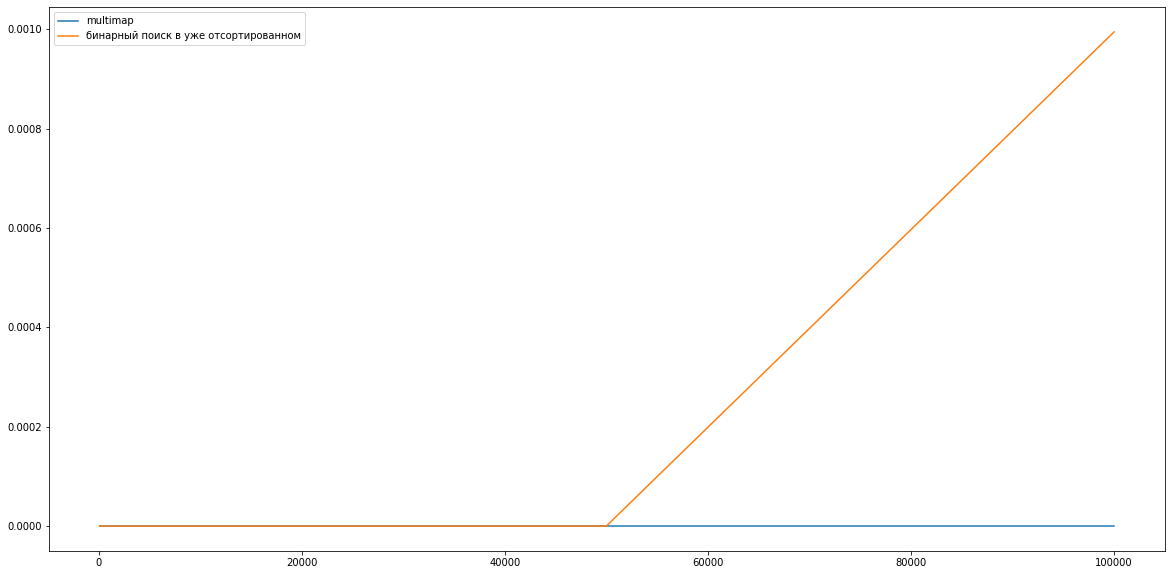

In [25]:
""" Построение графика зависимости времени бинарного поиска в отсортированном
и в ассоциативном массиве от величины выборки """
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(sizes, multimap_time, label = 'multimap')
ax.plot(sizes, binary_time, label = 'бинарный поиск в уже отсортированном')
ax.legend()
ax.plot()